## 1.EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [3]:
# df_test = pd.read_table("/kaggle/input/kdd-cup-2009-customer-relationship-prediction/orange_small_test.data").replace('\\', '/')
df_0 = pd.read_table("/content/drive/MyDrive/Data sets/Small Data/orange_small_train.data").replace('\\', '/')
labels = pd.read_table("/content/drive/MyDrive/Data sets/Small Data/orange_small_train_churn.labels").replace('\\', '/')

In [4]:
labels.columns = ["churn"]
labels

churn
0          1
1         -1
2         -1
3         -1
4         -1
...      ...
49994     -1
49995     -1
49996     -1
49997     -1
49998     -1

[49999 rows x 1 columns]

In [5]:
df_0["churn"] = labels["churn"]
df_0.head(10)

Var1  Var2  Var3  Var4  Var5    Var6  Var7  Var8  Var9  Var10  ...  \
0   NaN   NaN   NaN   NaN   NaN  1526.0   7.0   NaN   NaN    NaN  ...   
1   NaN   NaN   NaN   NaN   NaN   525.0   0.0   NaN   NaN    NaN  ...   
2   NaN   NaN   NaN   NaN   NaN  5236.0   7.0   NaN   NaN    NaN  ...   
3   NaN   NaN   NaN   NaN   NaN     NaN   0.0   NaN   NaN    NaN  ...   
4   NaN   NaN   NaN   NaN   NaN  1029.0   7.0   NaN   NaN    NaN  ...   
5   NaN   NaN   NaN   NaN   NaN   658.0   7.0   NaN   NaN    NaN  ...   
6   NaN   NaN   NaN   NaN   NaN  1680.0   7.0   NaN   NaN    NaN  ...   
7   NaN   NaN   NaN   NaN   NaN    77.0   0.0   NaN   NaN    NaN  ...   
8   NaN   NaN   NaN   NaN   NaN  1176.0   7.0   NaN   NaN    NaN  ...   
9   NaN   NaN   NaN   NaN   NaN  1141.0   7.0   NaN   NaN    NaN  ...   

    Var222      Var223  Var224  Var225  Var226   Var227  \
0  fXVEsaq  jySVZNlOJy     NaN     NaN    xb3V     RAYp   
1  2Kb5FSF  LM8l689qOp     NaN     NaN    fKCe     RAYp   
2  NKv4yOc  jySVZNlOJy     NaN    kG3k    Qu4f  02N6s8f   
3  CE7uk3u  LM8l689qOp     NaN     NaN    FSa2     RAYp   
4  1J2cvxe  LM8l689qOp     NaN    kG3k    FSa2     RAYp   
5  QqVuch3  LM8l689qOp     NaN     NaN    Qcbd  02N6s8f   
6  XlgxB9z  LM8l689qOp     NaN    kG3k    FSa2     RAYp   
7  R2LdzOv         NaN     NaN     NaN    FSa2     RAYp   
8  K2SqEo9  jySVZNlOJy     NaN    kG3k    PM2D     6fzt   
9  EPqQcw6  LM8l689qOp     NaN    kG3k    FSa2     RAYp   

                   Var228  Var229  Var230  churn  
0           F2FyR07IdsN7I     NaN     NaN    1.0  
1           F2FyR07IdsN7I     NaN     NaN   -1.0  
2           ib5G6X1eUxUn6    am7c     NaN   -1.0  
3           F2FyR07IdsN7I     NaN     NaN   -1.0  
4           F2FyR07IdsN7I    mj86     NaN   -1.0  
5                 Zy3gnGM    am7c     NaN   -1.0  
6                 55YFVY9    am7c     NaN   -1.0  
7           F2FyR07IdsN7I     NaN     NaN   -1.0  
8  am14IcfM7tWLrUmRT52KtA    am7c     NaN   -1.0  
9                 55YFVY9     NaN     NaN   -1.0  

[10 rows x 231 columns]

In [6]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 231 entries, Var1 to churn
dtypes: float64(192), int64(1), object(38)
memory usage: 88.1+ MB


In [7]:
df_0.describe().T

count           mean            std  min      25%       50%  \
Var1      702.0      11.487179      40.709951  0.0     0.00      0.00   
Var2     1241.0       0.004029       0.141933  0.0     0.00      0.00   
Var3     1240.0     425.298387    4270.193518  0.0     0.00      0.00   
Var4     1579.0       0.125396       1.275481  0.0     0.00      0.00   
Var5     1487.0  238793.328850  644125.905205  0.0     0.00      0.00   
...         ...            ...            ...  ...      ...       ...   
Var189  21022.0     270.142137      86.707692  6.0   204.00    270.00   
Var190    333.0   22007.045192   29085.146490  0.0  2732.67  12668.94   
Var209      0.0            NaN            NaN  NaN      NaN       NaN   
Var230      0.0            NaN            NaN  NaN      NaN       NaN   
churn   49999.0      -0.853117       0.521725 -1.0    -1.00     -1.00   

              75%        max  
Var1        16.00      680.0  
Var2         0.00        5.0  
Var3         0.00   130668.0  
Var4         0.00       27.0  
Var5    118742.50  6048550.0  
...           ...        ...  
Var189     330.00      642.0  
Var190   29396.34   230427.0  
Var209        NaN        NaN  
Var230        NaN        NaN  
churn       -1.00        1.0  

[193 rows x 8 columns]

In [8]:
# sns.pairplot(data=df_0, hue="churn", height=2)

# 2.Data Cleaning

## 2.1 Check duplicate

In [9]:
duplicate = df_0[df_0.duplicated()]
duplicate

Empty DataFrame
Columns: [Var1, Var2, Var3, Var4, Var5, Var6, Var7, Var8, Var9, Var10, Var11, Var12, Var13, Var14, Var15, Var16, Var17, Var18, Var19, Var20, Var21, Var22, Var23, Var24, Var25, Var26, Var27, Var28, Var29, Var30, Var31, Var32, Var33, Var34, Var35, Var36, Var37, Var38, Var39, Var40, Var41, Var42, Var43, Var44, Var45, Var46, Var47, Var48, Var49, Var50, Var51, Var52, Var53, Var54, Var55, Var56, Var57, Var58, Var59, Var60, Var61, Var62, Var63, Var64, Var65, Var66, Var67, Var68, Var69, Var70, Var71, Var72, Var73, Var74, Var75, Var76, Var77, Var78, Var79, Var80, Var81, Var82, Var83, Var84, Var85, Var86, Var87, Var88, Var89, Var90, Var91, Var92, Var93, Var94, Var95, Var96, Var97, Var98, Var99, Var100, ...]
Index: []

[0 rows x 231 columns]

There are no duplicated rows..

## 2.2 NaN Values

In [10]:
df_nan = df_0.isnull().sum()
# df_nan.columns=[["Variables", "# of NaNs"]]

plt.figure(figsize=(20,6))
plt.title("NaN values per features")

sns.histplot(data=df_nan, element="step", fill=False)


In [11]:
plt.figure(figsize=(20,6))
plt.title("Distribution of NaN values per features")

sns.kdeplot(data=df_nan, shade=True)


In [12]:
df_nan.describe()

count      231.000000
mean     34736.593074
std      20855.997280
min          0.000000
25%       5534.000000
50%      48513.000000
75%      49298.000000
max      50000.000000
dtype: float64

More than 50% from the variables contains more than 48513.0 NaN values

In [13]:
df_nan[df_nan==len(df_0)].value_counts()

50000    18
dtype: int64

18 variables contain 100% Nan values

**Getting rid of 18 NaN Variable**

In [14]:
df_0.drop(columns=df_0.columns[(df_0.isnull().sum()==len(df_0))], inplace=True)
# df_train.columns[df_train.isnull().any(axis = 0)]
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 213 entries, Var1 to churn
dtypes: float64(174), int64(1), object(38)
memory usage: 81.3+ MB


**18 variables have been deleted**

** % NaN per Records **

In [15]:
nan_per_records = df_0.isna().sum(axis = 1)/df_0.shape[1]
nan_per_records

0        0.676056
1        0.685446
2        0.652582
3        0.723005
4        0.643192
           ...   
49995    0.671362
49996    0.638498
49997    0.661972
49998    0.723005
49999    0.676056
Length: 50000, dtype: float64

** Delete records which contain 75% Nan **

In [16]:
df_0.drop(index=nan_per_records[nan_per_records>0.70].index, inplace=True)
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45265 entries, 0 to 49999
Columns: 213 entries, Var1 to churn
dtypes: float64(174), int64(1), object(38)
memory usage: 73.9+ MB


** % NaN per Feature **

In [17]:
nan_per_variables = df_0.isnull().sum()/df_0.shape[0]
nan_per_variables.describe().T

count    213.000000
mean       0.663422
std        0.448521
min        0.000000
25%        0.033116
50%        0.984469
75%        0.998056
max        1.000000
dtype: float64

In [18]:
df_0.drop(columns=list(nan_per_variables[nan_per_variables>=0.7].index), inplace=True)
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45265 entries, 0 to 49999
Data columns (total 75 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var6    43757 non-null  float64
 1   Var7    43766 non-null  float64
 2   Var13   43766 non-null  float64
 3   Var21   43757 non-null  float64
 4   Var22   43848 non-null  float64
 5   Var24   42297 non-null  float64
 6   Var25   43848 non-null  float64
 7   Var28   43847 non-null  float64
 8   Var35   43848 non-null  float64
 9   Var38   43848 non-null  float64
 10  Var44   43848 non-null  float64
 11  Var57   45265 non-null  float64
 12  Var65   43766 non-null  float64
 13  Var72   27601 non-null  float64
 14  Var73   45265 non-null  int64  
 15  Var74   43766 non-null  float64
 16  Var76   43848 non-null  float64
 17  Var78   43848 non-null  float64
 18  Var81   43757 non-null  float64
 19  Var83   43848 non-null  float64
 20  Var85   43848 non-null  float64
 21  Var94   27601 non-null  float64
 22

### 2.2.1 Handling Nan in object cols

In [19]:
s = df_0.dtypes=="object"
object_cols = list(s[s].index)
object_cols

['Var192',
 'Var193',
 'Var195',
 'Var196',
 'Var197',
 'Var198',
 'Var199',
 'Var200',
 'Var202',
 'Var203',
 'Var204',
 'Var205',
 'Var206',
 'Var207',
 'Var208',
 'Var210',
 'Var211',
 'Var212',
 'Var214',
 'Var216',
 'Var217',
 'Var218',
 'Var219',
 'Var220',
 'Var221',
 'Var222',
 'Var223',
 'Var225',
 'Var226',
 'Var227',
 'Var228',
 'Var229']

Handling Nan Values in categorical data

In [20]:
df_0[object_cols].head()

Var192   Var193 Var195 Var196 Var197   Var198         Var199   Var200  \
0  bZkvyxLkBI     RO12   taul   1K8T   lK27  ka_ns41     nQUveAzAF7      NaN   
1  CEat0G8rTN     RO12   taul   1K8T   2Ix5  qEdASpP     y2LIM01bE1      NaN   
2  eOQt0GoOh3  AERks4l   taul   1K8T   ffXs  NldASpP        y4g9XoZ  vynJTq9   
4  IXSgUHShse     RO12   taul   1K8T   uNkU  EKR938I        ThrHXVS  0v21jmy   
5  m9SrEy7Rm6  2Knk1KF   taul   1K8T   lK27  fayYfhR  etM739XNb0Rf0      NaN   

  Var202 Var203  ... Var219   Var220   Var221   Var222      Var223 Var225  \
0   dXGu   9_Y1  ...   FzaX  1YVfGrO     oslk  fXVEsaq  jySVZNlOJy    NaN   
1   lg1t   9_Y1  ...   FzaX  0AJo2f2     oslk  2Kb5FSF  LM8l689qOp    NaN   
2   4bTR   9_Y1  ...   FzaX  JFM1BiF  Al6ZaUT  NKv4yOc  jySVZNlOJy   kG3k   
4   xklU   9_Y1  ...   FzaX  OrnLfvc     oslk  1J2cvxe  LM8l689qOp   kG3k   
5   ae6C   9_Y1  ...   FzaX  KbkKEj0     zCkv  QqVuch3  LM8l689qOp    NaN   

  Var226   Var227         Var228 Var229  
0   xb3V     RAYp  F2FyR07IdsN7I    NaN  
1   fKCe     RAYp  F2FyR07IdsN7I    NaN  
2   Qu4f  02N6s8f  ib5G6X1eUxUn6   am7c  
4   FSa2     RAYp  F2FyR07IdsN7I   mj86  
5   Qcbd  02N6s8f        Zy3gnGM   am7c  

[5 rows x 32 columns]

In [21]:
df_0[object_cols] = df_0[object_cols].replace(np.nan, "other", )
df_0[object_cols].head(20)

Var192                              Var193      Var195 Var196 Var197  \
0   bZkvyxLkBI                                RO12        taul   1K8T   lK27   
1   CEat0G8rTN                                RO12        taul   1K8T   2Ix5   
2   eOQt0GoOh3                             AERks4l        taul   1K8T   ffXs   
4   IXSgUHShse                                RO12        taul   1K8T   uNkU   
5   m9SrEy7Rm6                             2Knk1KF        taul   1K8T   lK27   
6   Qu0qrQKzJV                             2Knk1KF        taul   1K8T   EJC9   
7   eOQgUHShse                                RO12  LfvqpCtLOY   1K8T   Bxva   
8   4e7Wq69R_D                                RO12        taul   1K8T   0Xwj   
9   J9Vr4RQZiT                             2Knk1KF        taul   1K8T   kNzO   
10  UCDvyx8zhV                          g62hiBSaKg        taul   1K8T   yMvB   
11  crIgUHSK8h                                RO12        taul   1K8T   lK27   
12  O8Zr4Rdc_a  onTuEhrJJQy_H3IHkZku5AFczhYGqxJ890        taul   1K8T   0aHy   
13  cFHt0GoOh3                                RO12        taul   1K8T   JLbT   
14  2jiWq69cTy                                RO12        taul   1K8T   ssAy   
15  _v2TmBftjz                             2Knk1KF        taul   1K8T   0Xwj   
16  FoxgUHSK8h  onTuEhrJJQy_H3IHkZku5AFczhYGqxJ890        taul   1K8T   0Xwj   
17  FAJgUH7ejg                             AERks4l        taul   1K8T   0Xwj   
18  TfiWq69R_D                                RO12        taul   1K8T   JLbT   
19  EsYrjIX0Db                                RO12        taul   1K8T   lK27   
20  75lq9ayfAo                                RO12        taul   1K8T   JLbT   

     Var198         Var199   Var200 Var202 Var203  ...   Var219   Var220  \
0   ka_ns41     nQUveAzAF7    other   dXGu   9_Y1  ...     FzaX  1YVfGrO   
1   qEdASpP     y2LIM01bE1    other   lg1t   9_Y1  ...     FzaX  0AJo2f2   
2   NldASpP        y4g9XoZ  vynJTq9   4bTR   9_Y1  ...     FzaX  JFM1BiF   
4   EKR938I        ThrHXVS  0v21jmy   xklU   9_Y1  ...     FzaX  OrnLfvc   
5   fayYfhR  etM739XNb0Rf0    other   ae6C   9_Y1  ...     FzaX  KbkKEj0   
6   ofiZR7x        LJF4fPp  QYxAlFM   5Rb0   9_Y1  ...     FzaX  JO03372   
7   Xlthli9     GaiUdPAZp_    other   Mx5G   9_Y1  ...    other  U8IKsQe   
8   6CXYbuk  okUBQrgaYWgG0  z1Qe5zX   1G9T   HLqf  ...     FzaX  ROeipLp   
9   jwhtMxl        koda1Jh  A4emZtf   HJm0   9_Y1  ...     FzaX  fabLnWA   
10  fhk21Ss        u2p2Afw  8xDcYaS   XeWN   9_Y1  ...     FzaX  4UxGlow   
11  FcmhANo     nQUeejKKqM  vO83GOe   gMVu   9_Y1  ...     qxDb  OXxlI5k   
12  fqeOwLG     _jTP8ioIlJ  7aLZlRR   WrUa   9_Y1  ...     FzaX  fxJmel6   
13  8Nsx4QS     tShEte6VIU  k8ssX88   yHE5   9_Y1  ...     FzaX  WaovEWW   
14  creCyD5     _jTP8ioIlJ    other   YI3u   9_Y1  ...     FzaX  Hlo8hdx   
15  Mqs4NQF        FoJylxy  nFLbAk0   w8Au   dgxZ  ...     FzaX  XsNOZ4E   
16  fqeOwLG     nQUq7hGe64  6IEmZtf   5xto   HLqf  ...     FzaX  fxJmel6   
17  fhk21Ss  YQcPlrpk3ptPA    other   wuAn   HLqf  ...  AU8pNoi  4UxGlow   
18  uMA4Shd     9UgkRNa9Jb  y37rlSq   0xFv   9_Y1  ...     qxDb  meWmFX7   
19  GRl7qwL        wqsRhwb    other   q9lF   9_Y1  ...     FzaX  xDj6pd1   
20  GUg04mC     7ONkRNQCK7    other   d8PQ   9_Y1  ...     FzaX  6g5Ojel   

     Var221   Var222      Var223 Var225 Var226   Var227  \
0      oslk  fXVEsaq  jySVZNlOJy  other   xb3V     RAYp   
1      oslk  2Kb5FSF  LM8l689qOp  other   fKCe     RAYp   
2   Al6ZaUT  NKv4yOc  jySVZNlOJy   kG3k   Qu4f  02N6s8f   
4      oslk  1J2cvxe  LM8l689qOp   kG3k   FSa2     RAYp   
5      zCkv  QqVuch3  LM8l689qOp  other   Qcbd  02N6s8f   
6      oslk  XlgxB9z  LM8l689qOp   kG3k   FSa2     RAYp   
7      oslk  R2LdzOv       other  other   FSa2     RAYp   
8      zCkv  K2SqEo9  jySVZNlOJy   kG3k   PM2D     6fzt   
9      oslk  EPqQcw6  LM8l689qOp   kG3k   FSa2     RAYp   
10     zCkv  catzS2D  LM8l689qOp   kG3k   WqMG     ZI9m   
11     oslk  VWtIBQt  LM8l689qOp   kG3k   FSa2     RAYp   
12     zCkv  WfsWw2A  

### 2.2.2 Handling Nan in Num cols

In [22]:
s = df_0.dtypes != "object"
num_cols = list(s[s].index)

df_0[num_cols] = df_0[num_cols].replace(np.nan, df_0.max(),)

df_0[num_cols].head(20)

Var6  Var7   Var13   Var21   Var22  Var24  Var25   Var28  Var35  \
0   1526.0   7.0   184.0   464.0   580.0   14.0  128.0  166.56    0.0   
1    525.0   0.0     0.0   168.0   210.0    2.0   24.0  353.52    0.0   
2   5236.0   7.0   904.0  1212.0  1515.0   26.0  816.0  220.08    0.0   
4   1029.0   7.0  3216.0    64.0    80.0    4.0   64.0  200.00    0.0   
5    658.0   7.0  3156.0   224.0   280.0    2.0   72.0  200.00    5.0   
6   1680.0   7.0  2952.0   308.0   385.0    4.0  128.0  176.56    0.0   
7     77.0   0.0     0.0    32.0    40.0    2.0   16.0  230.56    0.0   
8   1176.0   7.0  2912.0   200.0   250.0    2.0   64.0  300.32    0.0   
9   1141.0   7.0   164.0   208.0   260.0    2.0   72.0  166.56    5.0   
10   490.0   7.0  2060.0    92.0   115.0    6.0  112.0  133.12    0.0   
11   798.0  14.0  2892.0   236.0   295.0    8.0   40.0  133.12    5.0   
12   595.0   0.0  2044.0     0.0     0.0  494.0    0.0  240.56    0.0   
13  2268.0   0.0     0.0   480.0   600.0   10.0  216.0  176.56    0.0   
14  3633.0   7.0   500.0   148.0   185.0    0.0    8.0  236.08    0.0   
15   259.0   0.0   348.0     8.0    10.0    0.0    0.0  166.56    0.0   
16  5152.0   7.0  2024.0   584.0   730.0    6.0  320.0  220.08   30.0   
17  1449.0   7.0    28.0   168.0   210.0    2.0   32.0  166.56    5.0   
18   574.0   7.0  1752.0    12.0    15.0    2.0    0.0  253.52    0.0   
19   658.0   7.0     0.0   156.0   195.0    2.0   96.0  166.56    0.0   
20   245.0   0.0     0.0   168.0   210.0    2.0   56.0  272.08    0.0   

        Var38  ...  Var143  Var144      Var149      Var153  Var160     Var163  \
0      3570.0  ...     0.0     9.0    397579.0   1812252.0   142.0    38418.0   
1   4764966.0  ...     0.0     9.0    278334.0  10439160.0    32.0   238572.0   
2   5883894.0  ...     0.0    36.0    320565.0   9826360.0   206.0   434946.0   
4         0.0  ...     0.0     9.0    267162.0    644836.0     2.0        0.0   
5         0.0  ...     0.0     9.0      2639.0    745620.0    68.0    61368.0   
6     13158.0  ...     0.0    18.0     47019.0   2345424.0    52.0   417438.0   
7   3776496.0  ...     0.0     0.0   4233600.0  10577000.0     6.0  3628800.0   
8   6014460.0  ...     0.0     0.0    114695.0  10405680.0    26.0    98310.0   
9   5317974.0  ...     0.0    18.0    227892.0   7608840.0    28.0   132210.0   
10     3534.0  ...     0.0    18.0      9128.0     28704.0     0.0     8334.0   
11   446868.0  ...     0.0     0.0     50701.0    613124.0    38.0   154482.0   
12        0.0  ...     0.0    27.0  16934400.0         0.0     0.0        0.0   
13    87294.0  ...     0.0     0.0    793065.0   5710720.0   110.0  1521276.0   
14  8521620.0  ...     0.0    18.0         0.0  10297360.0    22.0        0.0   
15        0.0  ...     0.0     9.0         0.0     17016.0     0.0        0.0   
16  3253506.0  ...     0.0    36.0     27881.0   9025240.0    78.0  2008362.0   
17   548748.0  ...     0.0    18.0    173894.0    982036.0    34.0        0.0   
18        0.0  ...     0.0     9.0    170240.0   2898024.0     2.0   145920.0   
19        0.0  ...     0.0     0.0     32249.0   2807668.0    34.0   453654.0   
20  4663572.0  ...     0.0     0.0     31675.0  10535080.0    26.0  1582350.0   

    Var173  Var181  Var189  churn  
0      0.0     0.0   462.0    1.0  
1      0.0     0.0   642.0   -1.0  
2      0.0     0.0   642.0   -1.0  
4      0.0     0.0   642.0   -1.0  
5      0.0     0.0   642.0   -1.0  
6      0.0     0.0   228.0   -1.0  
7      0.0     0.0   642.0   -1.0  
8      0.0     0.0   642.0   -1.0  
9      2.0     0.0   642.0   -1.0  
10     0.0     0.0   642.0   -1.0  
11     0.0     0.0   234.0   -1.0  
12     0.0     0.0   642.0   -1.0  
13     0.0     0.0   642.0   -1.0  
14     0.0     0.0   264.0   -1.0  
15     0.0     0.0   240.0   -1.0  
16     0.0     0.0   642.0   -1.0  
17     0.0     0.0   642.0   -1.0  
18     0.0     0.0   642.0    1.0  
19     0.0     0.0   132.0   -1.0  
20     0.0     0.0   282.0   -1.0  

[20 rows x 43

In [23]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45265 entries, 0 to 49999
Data columns (total 75 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var6    45265 non-null  float64
 1   Var7    45265 non-null  float64
 2   Var13   45265 non-null  float64
 3   Var21   45265 non-null  float64
 4   Var22   45265 non-null  float64
 5   Var24   45265 non-null  float64
 6   Var25   45265 non-null  float64
 7   Var28   45265 non-null  float64
 8   Var35   45265 non-null  float64
 9   Var38   45265 non-null  float64
 10  Var44   45265 non-null  float64
 11  Var57   45265 non-null  float64
 12  Var65   45265 non-null  float64
 13  Var72   45265 non-null  float64
 14  Var73   45265 non-null  int64  
 15  Var74   45265 non-null  float64
 16  Var76   45265 non-null  float64
 17  Var78   45265 non-null  float64
 18  Var81   45265 non-null  float64
 19  Var83   45265 non-null  float64
 20  Var85   45265 non-null  float64
 21  Var94   45265 non-null  float64
 22

## 2.2 Unique Vales

Now we check whether the label is a balanced or imbalanced.

In [24]:
# sns.histplot(data=df_train, kde=True,)

In [25]:
df_0["churn"].value_counts()

-1.0    41915
 1.0     3350
Name: churn, dtype: int64

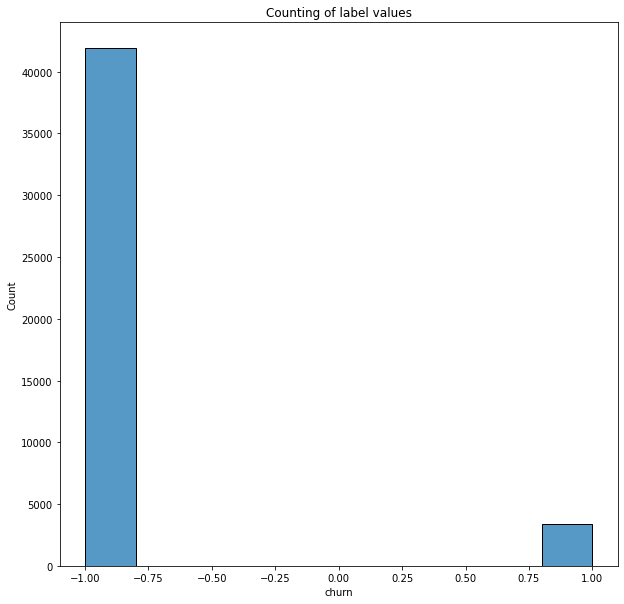

In [26]:
plt.figure(figsize=(10,10))
plt.title("Counting of label values")

sns.histplot(data=df_0["churn"], bins=10)

**The analysis has done above clearly shows that the dataset is a highly imbalanced.
**

In [27]:
sns.countplot(x="Var193",data=df_0)

In [28]:
uniqe_values={}

for col in df_0:
    uniqe_values[col]= len(df_0[col].unique())
    

{k: v for k, v in sorted(uniqe_values.items(), key=lambda item: item[1])}

{'Var211': 2,
 'churn': 2,
 'Var208': 3,
 'Var218': 3,
 'Var143': 4,
 'Var173': 4,
 'Var196': 4,
 'Var205': 4,
 'Var225': 4,
 'Var223': 5,
 'Var229': 5,
 'Var181': 6,
 'Var203': 6,
 'Var210': 6,
 'Var221': 7,
 'Var227': 7,
 'Var7': 8,
 'Var44': 8,
 'Var72': 8,
 'Var144': 10,
 'Var35': 13,
 'Var78': 13,
 'Var207': 14,
 'Var65': 15,
 'Var132': 19,
 'Var206': 22,
 'Var195': 23,
 'Var219': 23,
 'Var226': 23,
 'Var228': 30,
 'Var126': 51,
 'Var193': 51,
 'Var212': 81,
 'Var24': 93,
 'Var189': 97,
 'Var204': 100,
 'Var73': 130,
 'Var85': 149,
 'Var83': 195,
 'Var109': 209,
 'Var197': 225,
 'Var112': 230,
 'Var25': 271,
 'Var123': 298,
 'Var192': 362,
 'Var74': 371,
 'Var160': 401,
 'Var21': 732,
 'Var22': 733,
 'Var119': 1481,
 'Var6': 1483,
 'Var216': 1991,
 'Var13': 2633,
 'Var140': 2648,
 'Var198': 4025,
 'Var220': 4025,
 'Var222': 4025,
 'Var28': 4128,
 'Var199': 4719,
 'Var202': 5630,
 'Var125': 10488,
 'Var217': 13188,
 'Var200': 15410,
 'Var214': 15410,
 'Var149': 18500,
 'Var94': 199

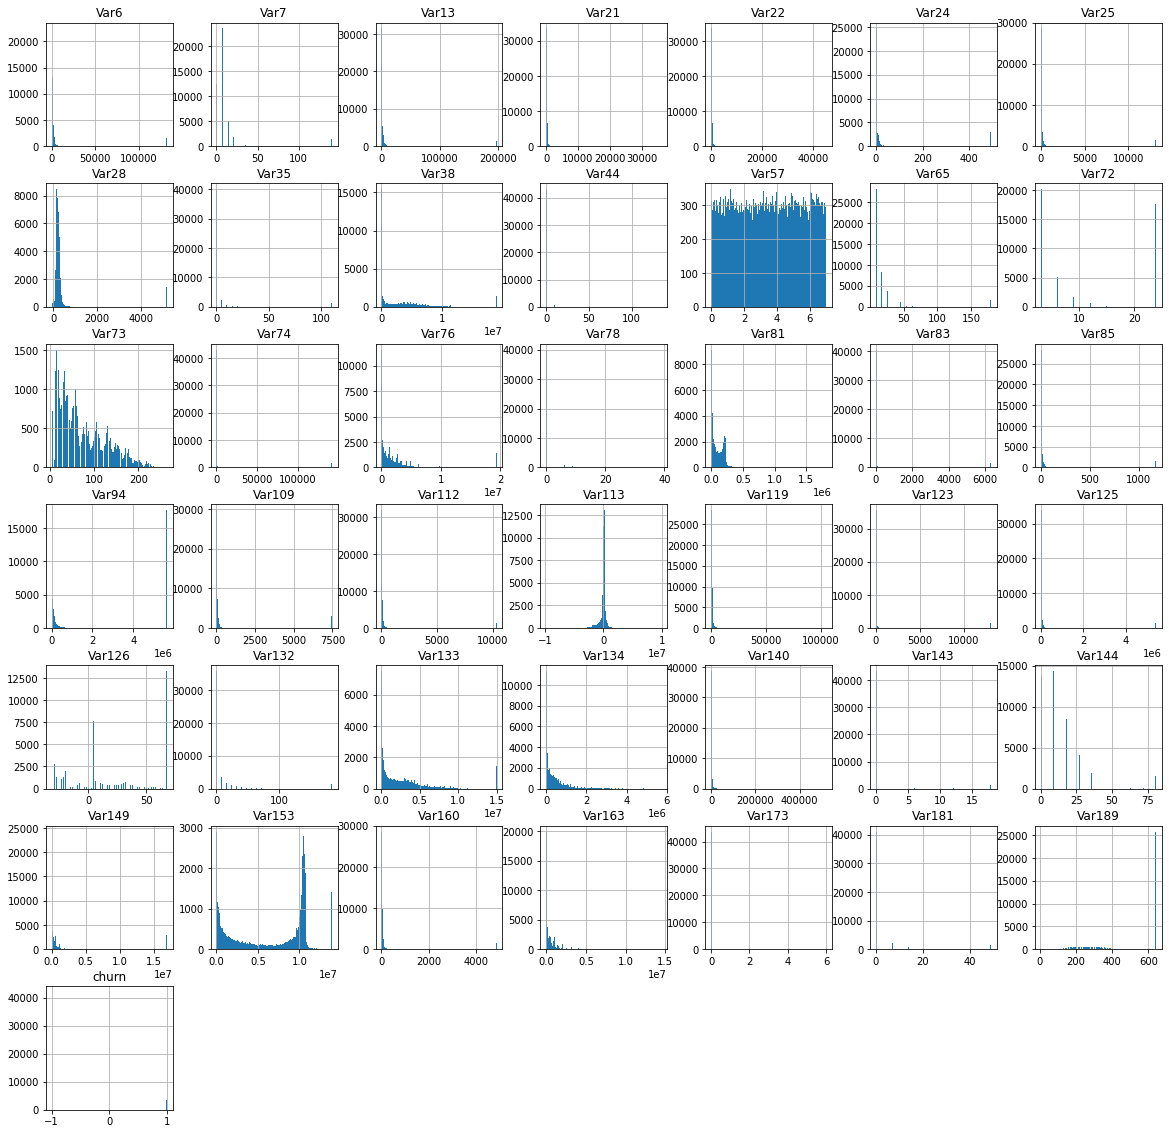

In [29]:
df_0[num_cols].hist(figsize=(20,20), bins=150)
plt.show()

**There is a lot of variation in the number of unique values owned by each feature.**

## 2.3 Categorical Values

In [30]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45265 entries, 0 to 49999
Data columns (total 75 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var6    45265 non-null  float64
 1   Var7    45265 non-null  float64
 2   Var13   45265 non-null  float64
 3   Var21   45265 non-null  float64
 4   Var22   45265 non-null  float64
 5   Var24   45265 non-null  float64
 6   Var25   45265 non-null  float64
 7   Var28   45265 non-null  float64
 8   Var35   45265 non-null  float64
 9   Var38   45265 non-null  float64
 10  Var44   45265 non-null  float64
 11  Var57   45265 non-null  float64
 12  Var65   45265 non-null  float64
 13  Var72   45265 non-null  float64
 14  Var73   45265 non-null  int64  
 15  Var74   45265 non-null  float64
 16  Var76   45265 non-null  float64
 17  Var78   45265 non-null  float64
 18  Var81   45265 non-null  float64
 19  Var83   45265 non-null  float64
 20  Var85   45265 non-null  float64
 21  Var94   45265 non-null  float64
 22

In [31]:
# fig, ax = plt.subplots(len(object_cols))
# fig.suptitle('Vertically stacked subplots')

# for i, cat in enumerate(object_cols):
#     ax[i].bar(df_0[cat], width=0.6, height=0.5, color='b', align='center')



In [32]:
for cat in object_cols:
    fq = df_0.groupby(cat).size()/len(df_0)
    df_0.loc[:, "{}_freq_encode".format(cat)] = df_0[cat].map(fq)


df_0.head()


Var6  Var7   Var13   Var21   Var22  Var24  Var25   Var28  Var35  \
0  1526.0   7.0   184.0   464.0   580.0   14.0  128.0  166.56    0.0   
1   525.0   0.0     0.0   168.0   210.0    2.0   24.0  353.52    0.0   
2  5236.0   7.0   904.0  1212.0  1515.0   26.0  816.0  220.08    0.0   
4  1029.0   7.0  3216.0    64.0    80.0    4.0   64.0  200.00    0.0   
5   658.0   7.0  3156.0   224.0   280.0    2.0   72.0  200.00    5.0   

       Var38  ...  Var219_freq_encode  Var220_freq_encode  Var221_freq_encode  \
0     3570.0  ...            0.823992            0.002386            0.731382   
1  4764966.0  ...            0.823992            0.003623            0.731382   
2  5883894.0  ...            0.823992            0.001679            0.033646   
4        0.0  ...            0.823992            0.000685            0.731382   
5        0.0  ...            0.823992            0.000795            0.131713   

   Var222_freq_encode  Var223_freq_encode  Var225_freq_encode  \
0            0.002386            0.131338            0.473257   
1            0.003623            0.738761            0.473257   
2            0.001679            0.131338            0.230377   
4            0.000685            0.738761            0.230377   
5            0.000795            0.738761            0.473257   

   Var226_freq_encode  Var227_freq_encode  Var228_freq_encode  \
0            0.041798            0.693494            0.626422   
1            0.051850            0.693494            0.626422   
2            0.096476            0.040517            0.058655   
4            0.162510            0.693494            0.626422   
5            0.042505            0.040517            0.020678   

   Var229_freq_encode  
0            0.523915  
1            0.523915  
2            0.258080  
4            0.216414  
5            0.258080  

[5 rows x 107 columns]

In [33]:
s = df_0.dtypes!="object"
new_num_cols = list(s[s].index)
len(new_num_cols)

75

In [34]:
df_1 = pd.DataFrame({})
df_1[new_num_cols] = df_0[new_num_cols].copy()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45265 entries, 0 to 49999
Data columns (total 75 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Var6                45265 non-null  float64
 1   Var7                45265 non-null  float64
 2   Var13               45265 non-null  float64
 3   Var21               45265 non-null  float64
 4   Var22               45265 non-null  float64
 5   Var24               45265 non-null  float64
 6   Var25               45265 non-null  float64
 7   Var28               45265 non-null  float64
 8   Var35               45265 non-null  float64
 9   Var38               45265 non-null  float64
 10  Var44               45265 non-null  float64
 11  Var57               45265 non-null  float64
 12  Var65               45265 non-null  float64
 13  Var72               45265 non-null  float64
 14  Var73               45265 non-null  int64  
 15  Var74               45265 non-null  float64
 16  Var7

### 2.4 Standardization


In [35]:
df_1.describe()

Var6          Var7          Var13         Var21         Var22  \
count   45265.000000  45265.000000   45265.000000  45265.000000  45265.000000   
mean     5680.610339     11.318458    7779.329548   1436.811665   1705.272838   
std     23556.391048     24.612622   35289.069802   6491.141494   7875.419705   
min         0.000000      0.000000       0.000000      0.000000      0.000000   
25%       539.000000      0.000000       0.000000    116.000000    145.000000   
50%       882.000000      7.000000     284.000000    148.000000    185.000000   
75%      1547.000000      7.000000    1916.000000    248.000000    310.000000   
max    131761.000000    140.000000  197872.000000  36272.000000  45340.000000   

              Var24         Var25         Var28         Var35         Var38  \
count  45265.000000  45265.000000  45265.000000  45265.000000  4.526500e+04   
mean      36.618403    507.593063    380.620343      4.147575  3.122332e+06   
std      121.543136   2285.890552    864.575048     19.260122  4.098604e+06   
min        0.000000      0.000000    -66.880000      0.000000  0.000000e+00   
25%        0.000000     16.000000    166.560000      0.000000  1.393200e+04   
50%        2.000000     56.000000    220.080000      0.000000  1.588890e+06   
75%        6.000000    128.000000    276.560000      0.000000  4.888080e+06   
max      494.000000  13168.000000   5158.560000    110.000000  1.884690e+07   

       ...  Var219_freq_encode  Var220_freq_encode  Var221_freq_encode  \
count  ...        45265.000000        45265.000000        45265.000000   
mean   ...            0.687266            0.011741            0.558258   
std    ...            0.296151            0.028757            0.286634   
min    ...            0.000022            0.000022            0.003093   
25%    ...            0.823992            0.000464            0.131713   
50%    ...            0.823992            0.000840            0.731382   
75%    ...            0.823992            0.001900            0.731382   
max    ...            0.823992            0.097802            0.731382   

       Var222_freq_encode  Var223_freq_encode  Var225_freq_encode  \
count        45265.000000        45265.000000        45265.000000   
mean             0.011741            0.571699            0.339454   
std              0.028757            0.281521            0.133128   
min              0.000022            0.003579            0.052027   
25%              0.000464            0.131338            0.230377   
50%              0.000840            0.738761            0.244339   
75%              0.001900            0.738761            0.473257   
max              0.097802            0.738761            0.473257   

       Var226_freq_encode  Var227_freq_encode  Var228_freq_encode  \
count        45265.000000        45265.000000        45265.000000   
mean             0.068500            0.507634            0.409951   
std              0.047084            0.280495            0.281015   
min              0.007136            0.000464            0.000022   
25%              0.028587            0.131912            0.058655   
50%              0.052248            0.693494            0.626422   
75%              0.096476            0.693494            0.626422   
max              0.162510            0.693494            0.626422   

       Var229_freq_encode  
count        45265.000000  
mean             0.387929  
std              0.143683  
min              0.000795  
25%              0.258080  
50%              0.523915  
75%              0.523915  
max              0.523915  

[8 rows x 75 columns]

In [36]:
df_2 = pd.DataFrame({})
df_2["churn"] = df_1["churn"].copy()

In [37]:
df_train_without_label = df_1.drop("churn", axis=1)
df_train_without_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45265 entries, 0 to 49999
Data columns (total 74 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Var6                45265 non-null  float64
 1   Var7                45265 non-null  float64
 2   Var13               45265 non-null  float64
 3   Var21               45265 non-null  float64
 4   Var22               45265 non-null  float64
 5   Var24               45265 non-null  float64
 6   Var25               45265 non-null  float64
 7   Var28               45265 non-null  float64
 8   Var35               45265 non-null  float64
 9   Var38               45265 non-null  float64
 10  Var44               45265 non-null  float64
 11  Var57               45265 non-null  float64
 12  Var65               45265 non-null  float64
 13  Var72               45265 non-null  float64
 14  Var73               45265 non-null  int64  
 15  Var74               45265 non-null  float64
 16  Var7

In [38]:
from sklearn.preprocessing import StandardScaler

num_scaler=StandardScaler()

scaled_df = pd.DataFrame(num_scaler.fit_transform(df_train_without_label),
                         columns=df_train_without_label.columns, index=df_train_without_label.index)
scaled_df.describe()

Var6          Var7         Var13         Var21         Var22  \
count  4.526500e+04  4.526500e+04  4.526500e+04  4.526500e+04  4.526500e+04   
mean  -2.448794e-17 -4.144113e-17 -1.820898e-17 -2.197636e-17 -2.511584e-18   
std    1.000011e+00  1.000011e+00  1.000011e+00  1.000011e+00  1.000011e+00   
min   -2.411521e-01 -4.598690e-01 -2.204483e-01 -2.213521e-01 -2.165334e-01   
25%   -2.182706e-01 -4.598690e-01 -2.204483e-01 -2.034814e-01 -1.981215e-01   
50%   -2.037096e-01 -1.754590e-01 -2.124004e-01 -1.985515e-01 -1.930424e-01   
75%   -1.754792e-01 -1.754590e-01 -1.661533e-01 -1.831457e-01 -1.771700e-01   
max    5.352339e+00  5.228332e+00  5.386789e+00  5.366633e+00  5.540684e+00   

              Var24         Var25         Var28         Var35         Var38  \
count  4.526500e+04  4.526500e+04  4.526500e+04  4.526500e+04  4.526500e+04   
mean  -7.534751e-18 -2.386005e-17  5.651063e-18 -5.839432e-17 -1.695319e-17   
std    1.000011e+00  1.000011e+00  1.000011e+00  1.000011e+00  1.000011e+00   
min   -3.012824e-01 -2.220573e-01 -5.176014e-01 -2.153476e-01 -7.618122e-01   
25%   -3.012824e-01 -2.150578e-01 -2.475930e-01 -2.153476e-01 -7.584129e-01   
50%   -2.848272e-01 -1.975589e-01 -1.856890e-01 -2.153476e-01 -3.741418e-01   
75%   -2.519167e-01 -1.660610e-01 -1.203614e-01 -2.153476e-01  4.308216e-01   
max    3.763163e+00  5.538562e+00  5.526406e+00  5.495998e+00  3.836609e+00   

       ...  Var219_freq_encode  Var220_freq_encode  Var221_freq_encode  \
count  ...        4.526500e+04        4.526500e+04        4.526500e+04   
mean   ...       -3.034307e-16       -2.134846e-17       -1.246373e-16   
std    ...        1.000011e+00        1.000011e+00        1.000011e+00   
min    ...       -2.320611e+00       -4.075111e-01       -1.936863e+00   
25%    ...        4.616811e-01       -3.921460e-01       -1.488132e+00   
50%    ...        4.616811e-01       -3.790857e-01        6.039957e-01   
75%    ...        4.616811e-01       -3.422094e-01        6.039957e-01   
max    ...        4.616811e-01        2.992790e+00        6.039957e-01   

       Var222_freq_encode  Var223_freq_encode  Var225_freq_encode  \
count        4.526500e+04        4.526500e+04        4.526500e+04   
mean        -2.134846e-17        8.366713e-17       -1.186723e-16   
std          1.000011e+00        1.000011e+00        1.000011e+00   
min         -4.075111e-01       -2.018061e+00       -2.159060e+00   
25%         -3.921460e-01       -1.564240e+00       -8.193558e-01   
50%         -3.790857e-01        5.934329e-01       -7.144762e-01   
75%         -3.422094e-01        5.934329e-01        1.005085e+00   
max          2.992790e+00        5.934329e-01        1.005085e+00   

       Var226_freq_encode  Var227_freq_encode  Var228_freq_encode  \
count        4.526500e+04        4.526500e+04        4.526500e+04   
mean         4.928983e-17        1.946477e-17        4.269692e-17   
std          1.000011e+00        1.000011e+00        1.000011e+00   
min         -1.303289e+00       -1.808144e+00       -1.458759e+00   
25%         -8.476879e-01       -1.339510e+00       -1.250111e+00   
50%         -3.451656e-01        6.626206e-01        7.703248e-01   
75%          5.941897e-01        6.626206e-01        7.703248e-01   
max          1.996654e+00        6.626206e-01        7.703248e-01   

       Var229_freq_encode  
count        4.526500e+04  
mean        -2.951111e-16  
std          1.000011e+00  
min         -2.694382e+00  
25%         -9.037223e-01  
50%          9.464411e-01  
75%          9.464411e-01  
max          9.464411e-01  

[8 rows x 74 columns]

In [39]:
df_2[df_train_without_label.columns] = scaled_df.copy()
df_2.head(5)

churn      Var6      Var7     Var13     Var21     Var22     Var24  \
0    1.0 -0.176371 -0.175459 -0.215234 -0.149869 -0.142886 -0.186096   
1   -1.0 -0.218865 -0.459869 -0.220448 -0.195470 -0.189868 -0.284827   
2   -1.0 -0.018875 -0.175459 -0.194831 -0.034634 -0.024161 -0.087364   
4   -1.0 -0.197469 -0.175459 -0.129314 -0.211492 -0.206375 -0.268372   
5   -1.0 -0.213219 -0.175459 -0.131015 -0.186843 -0.180979 -0.284827   

      Var25     Var28     Var35  ...  Var219_freq_encode  Var220_freq_encode  \
0 -0.166061 -0.247593 -0.215348  ...            0.461681           -0.325308   
1 -0.211558 -0.031346 -0.215348  ...            0.461681           -0.282285   
2  0.134919 -0.185689 -0.215348  ...            0.461681           -0.349892   
4 -0.194059 -0.208915 -0.215348  ...            0.461681           -0.384463   
5 -0.190559 -0.208915  0.044259  ...            0.461681           -0.380622   

   Var221_freq_encode  Var222_freq_encode  Var223_freq_encode  \
0            0.603996           -0.325308           -1.564240   
1            0.603996           -0.282285            0.593433   
2           -1.830268           -0.349892           -1.564240   
4            0.603996           -0.384463            0.593433   
5           -1.488132           -0.380622            0.593433   

   Var225_freq_encode  Var226_freq_encode  Var227_freq_encode  \
0            1.005085           -0.567101            0.662621   
1            1.005085           -0.353611            0.662621   
2           -0.819356            0.594190           -1.665348   
4           -0.819356            1.996654            0.662621   
5            1.005085           -0.552087           -1.665348   

   Var228_freq_encode  Var229_freq_encode  
0            0.770325            0.946441  
1            0.770325            0.946441  
2           -1.250111           -0.903722  
4            0.770325           -1.193709  
5           -1.385253           -0.903722  

[5 rows x 75 columns]

In [40]:
df_2.describe().T

count          mean       std       min       25%  \
churn               45265.0 -8.519828e-01  0.523576 -1.000000 -1.000000   
Var6                45265.0 -2.448794e-17  1.000011 -0.241152 -0.218271   
Var7                45265.0 -4.144113e-17  1.000011 -0.459869 -0.459869   
Var13               45265.0 -1.820898e-17  1.000011 -0.220448 -0.220448   
Var21               45265.0 -2.197636e-17  1.000011 -0.221352 -0.203481   
...                     ...           ...       ...       ...       ...   
Var225_freq_encode  45265.0 -1.186723e-16  1.000011 -2.159060 -0.819356   
Var226_freq_encode  45265.0  4.928983e-17  1.000011 -1.303289 -0.847688   
Var227_freq_encode  45265.0  1.946477e-17  1.000011 -1.808144 -1.339510   
Var228_freq_encode  45265.0  4.269692e-17  1.000011 -1.458759 -1.250111   
Var229_freq_encode  45265.0 -2.951111e-16  1.000011 -2.694382 -0.903722   

                         50%       75%       max  
churn              -1.000000 -1.000000  1.000000  
Var6               -0.203710 -0.175479  5.352339  
Var7               -0.175459 -0.175459  5.228332  
Var13              -0.212400 -0.166153  5.386789  
Var21              -0.198552 -0.183146  5.366633  
...                      ...       ...       ...  
Var225_freq_encode -0.714476  1.005085  1.005085  
Var226_freq_encode -0.345166  0.594190  1.996654  
Var227_freq_encode  0.662621  0.662621  0.662621  
Var228_freq_encode  0.770325  0.770325  0.770325  
Var229_freq_encode  0.946441  0.946441  0.946441  

[75 rows x 8 columns]

### 2.4 Correlation

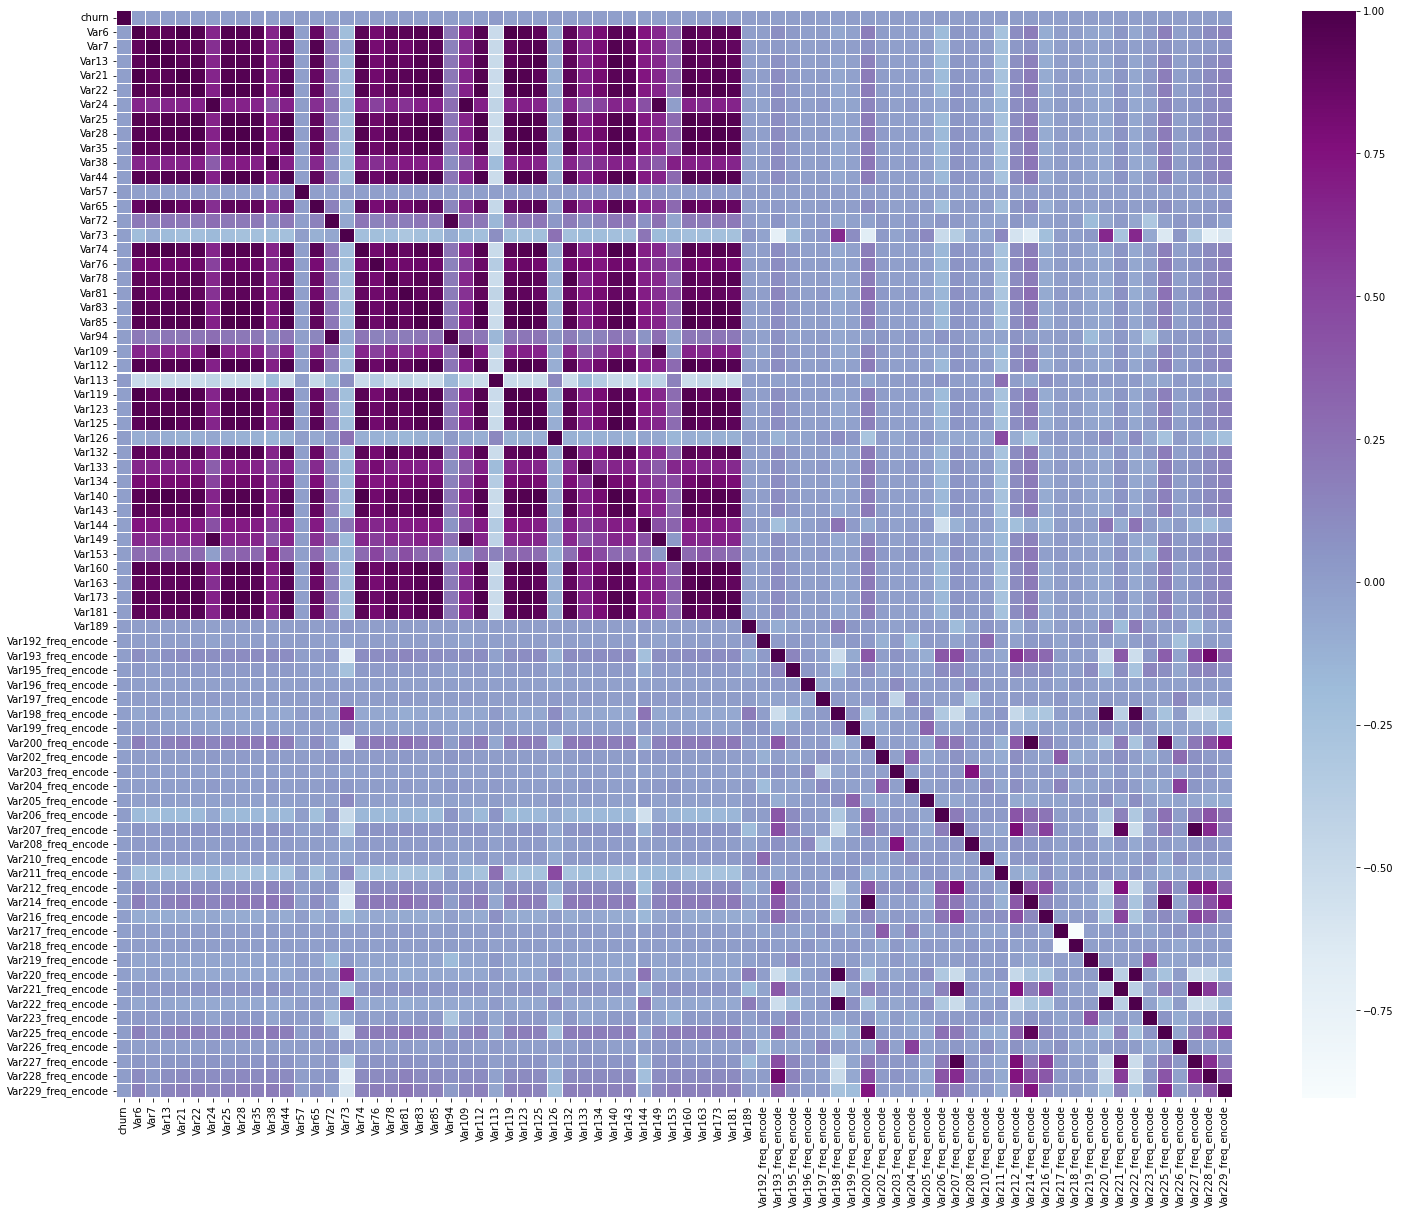

In [41]:
dfCorr = df_2.corr()
plt.figure(figsize=(25,20))
sns.heatmap(dfCorr,cmap="BuPu",linewidths=0.005)

In [42]:
# g = sns.catplot(
#     data=df_train, x="Var192", y="Var193", col="churn",
#     kind="bar", height=4, aspect=.6,
# )
# g.set_axis_labels("", "Survival Rate")
# g.set_xticklabels(["Men", "Women", "Children"])
# g.set_titles("{col_name} {col_var}")
# g.set(ylim=(0, 1))
# g.despine(left=True)


### 2.4 Outliers

In [43]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45265 entries, 0 to 49999
Data columns (total 75 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   churn               45265 non-null  float64
 1   Var6                45265 non-null  float64
 2   Var7                45265 non-null  float64
 3   Var13               45265 non-null  float64
 4   Var21               45265 non-null  float64
 5   Var22               45265 non-null  float64
 6   Var24               45265 non-null  float64
 7   Var25               45265 non-null  float64
 8   Var28               45265 non-null  float64
 9   Var35               45265 non-null  float64
 10  Var38               45265 non-null  float64
 11  Var44               45265 non-null  float64
 12  Var57               45265 non-null  float64
 13  Var65               45265 non-null  float64
 14  Var72               45265 non-null  float64
 15  Var73               45265 non-null  float64
 16  Var7

In [44]:
sns.boxplot(data=df_2)


In [45]:
from scipy import stats

final_df = df_2[(np.abs(stats.zscore(df_2))<3).all(axis=1)]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29591 entries, 2 to 49995
Data columns (total 75 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   churn               29591 non-null  float64
 1   Var6                29591 non-null  float64
 2   Var7                29591 non-null  float64
 3   Var13               29591 non-null  float64
 4   Var21               29591 non-null  float64
 5   Var22               29591 non-null  float64
 6   Var24               29591 non-null  float64
 7   Var25               29591 non-null  float64
 8   Var28               29591 non-null  float64
 9   Var35               29591 non-null  float64
 10  Var38               29591 non-null  float64
 11  Var44               29591 non-null  float64
 12  Var57               29591 non-null  float64
 13  Var65               29591 non-null  float64
 14  Var72               29591 non-null  float64
 15  Var73               29591 non-null  float64
 16  Var7

In [46]:
sns.boxplot(data=final_df)


# 3.Models Training

## 3.1 Data Splitiing

In [48]:
from sklearn.model_selection import train_test_split

y = df_2["churn"]
X = df_2.drop("churn", axis=1)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


## 3.2 kmeans

In [47]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV

# clf = GradientBoostingClassifier( random_state=0)

# params = {
#     'n_estimators': [450, 500], 
#     'learning_rate': [0.1, 0.5,],
#      'max_depth': [ 8, 9],
# }

# gs = GridSearchCV(clf, params, cv=5, scoring='roc_auc')
# gs.fit(X_train, y_train)

# print('best AUC ROC is', gs.best_score_)
# print('best parameters are', gs.best_params_)                       

In [48]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_2)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
    
    

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


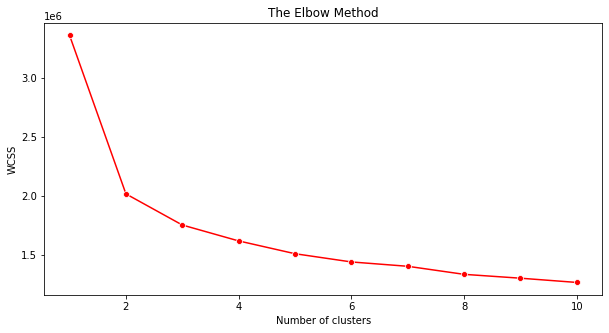

In [49]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_2)

y_kmeans

array([4, 4, 2, ..., 0, 0, 4], dtype=int32)

In [51]:
df_3 = df_2.copy() 
df_3["class_kmeans"] = pd.Series(y_kmeans)

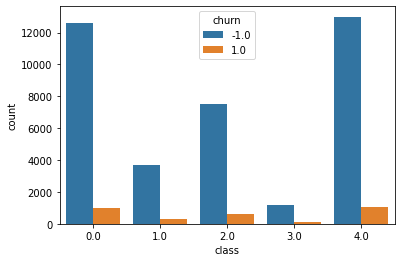

In [52]:
sns.countplot(data=df_kmeans, x="class", hue="churn")


## 3.3 agnes

In [ ]:
from sklearn.cluster import AgglomerativeClustering
first_time = time.time()

agnes = AgglomerativeClustering().fit(df_2)

print(time.time() - first_time)



agnes_labels_pred = agnes.labels_


In [1]:
df_3["class_agnes"] = agnes_labels_pred

NameError: ignored

In [ ]:
sns.countplot(data=df_agnes, x="class", hue="churn")


## 3.4 ROCK

In [3]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395121 sha256=9e21d02ae8b47f09d6595d505151a71552a7dc6bc7fe8f7aa8849ebdc1cd3684
  Stored in directory: /root/.cache/pip/wheels/dc/25/8b/072b221a5cff4f04e7999d39ca1b6cb5dad702cc3e1da951d4
Successfully built pyclustering


In [ ]:
from pyclustering.cluster.rock import rock
first_time = time.time()

rock_instance = rock(df_0, 1.0, 5, threshold=0.8)

print(time.time() - first_time)
rock_instance.process()
rock_labels_pred = rock_instance.get_clusters()


In [ ]:
df_3["class_rock"] = rock_labels_pred

## 3.5. BIRCH

In [ ]:
from sklearn.cluster import Birch
first_time = time.time()
brc = Birch(n_clusters=6)
brc.fit(df_2)
print(time.time() - first_time)
birch_labels_pred = rock_instance.get_clusters()


In [ ]:
df_3["class_birch"] = birch_labels_pred

## 3.6 Affinity Propagation

## 3.7 Mean Shift

## 3.8 Spectral clustering

## 3.9 Hierarchical clustering

## 3.10 DBSCAN

## 3.11 SOM

In [53]:
!pip install sklearn-som

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn_som.som import SOM
som = SOM(m=3, n=1, dim=2)
som.fit(df_2)

# 4. Clustering performance evaluation